In [2]:
import sys; sys.path.append('..')
import random
import pyzx as zx
%config InlineBackend.figure_format = 'svg'

In [3]:
g0 = zx.generate.cliffords(4,100)
zx.d3.draw(g0)

In [4]:
zx.simplify.clifford_simp(g0)

spider_simp: 40. 21. 11. 4. 2. 1.  6 iterations
id_simp: 23. 4. 1.  3 iterations
spider_simp: 13. 8. 3. 1.  4 iterations
pivot_simp: 8. 4.  2 iterations
lcomp_simp: 18. 9. 5. 4. 2. 2. 3. 1.  8 iterations
pivot_simp: 1.  1 iterations


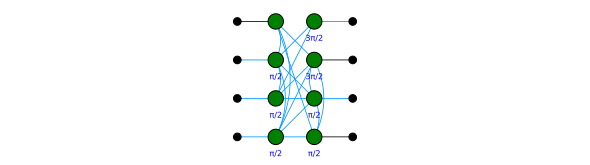

In [5]:
g0.normalise()
zx.draw(g0)

In [6]:
g1 = zx.generate.cliffords(8,10000)
zx.simplify.clifford_simp(g1)

spider_simp: 3649. 2218. 1259. 603. 223. 69. 9. 2.  8 iterations
id_simp: 1307. 136. 2.  3 iterations
spider_simp: 1343. 682. 266. 81. 21. 2.  6 iterations
pivot_simp: 965. 342. 136. 37. 8.  5 iterations
lcomp_simp: 1901. 735. 458. 321. 240. 183. 152. 137. 116. 92. 78. 74. 60. 58. 39. 40. 46. 38. 38. 33. 30. 30. 21. 22. 19. 15. 15. 14. 11. 13. 14. 10. 7. 8. 7. 10. 5. 8. 7. 6. 4. 5. 5. 3. 3. 5. 4. 3. 1. 3. 3. 3. 2. 2. 2.  55 iterations


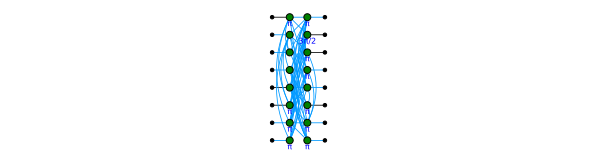

In [7]:
g1.normalise()
zx.draw(g1)

In [8]:
random.seed(1344)
g = zx.generate.cliffordT(4,350,p_t=0.01)
c = zx.Circuit.from_graph(g)
print(c.stats())

Circuit  on 4 qubits with 350 gates.
        4 is the T-count
        346 Cliffords among which 
        109 2-qubit gates and 0 Hadamard gates.


In [9]:
c1 = zx.optimize.basic_optimization(c.split_phase_gates())
print(c1.stats())

Circuit  on 4 qubits with 195 gates.
        4 is the T-count
        191 Cliffords among which 
        86 2-qubit gates and 43 Hadamard gates.


In [10]:
g = c1.to_graph()
zx.d3.draw(g)

Now we simplify our circuit

In [11]:
zx.simplify.clifford_simp(g)
g.normalise()
zx.d3.draw(g)

spider_simp: 58. 37. 15. 12. 4. 1.  6 iterations
id_simp: 1.  1 iterations
spider_simp: 8. 1.  2 iterations
pivot_simp: 15. 6. 2. 2.  4 iterations
lcomp_simp: 33. 12. 11. 6. 6. 4. 4. 4. 3. 1. 1. 1. 1.  13 iterations


Finally we extract a circuit from this diagram.

In [12]:
c2 = zx.extract.streaming_extract(g.copy())
print(c2.to_basic_gates().stats())
zx.d3.draw(c2.to_graph())

Circuit  on 4 qubits with 41 gates.
        4 is the T-count
        37 Cliffords among which 
        21 2-qubit gates and 12 Hadamard gates.


In [ ]:
c.verify_equality(c2)

In [ ]:
c3 = c2.copy()
c3.gates[5] = zx.gates.HAD(3)

In [ ]:
c.verify_equality(c3)